# Machine Learning - gezichten

### van: Mart Veldkamp

# Inhoudsopgave

1. Inleiding
2. Het probleem
3. Library's laden + data ophalen
4. Data voorbereiden & opschonen
    - Greyscale maken
5. Modellen selecteren
    - haar cascade classifier
    - CNN (Convolutional neural network)
6. Modellen trainen en testen
    - Classifier specificeren
    - Gezichten detecteren
    - Resultaat laten zien
    - de accuracy bepalen
7. Conclusie
8. Bronnen

# 1. Inleiding
Deze opdracht is onderdeel van het overkoepelende vak Machine Learning, dit is één van de meerdere datasets die ik gebruik in dit vak, per dataset zijn ten minste 2 verschillende classifiers gebruikt. Deze 6 opdrachten bestaan uit classificatie- en regressieproblemen. En zijn allemaal op een andere manier opgelost.

Alle code in deze opdrachten zijn van mijzelf, gebasseerd op code uit de lessen, of waar ik zelf vast liep gebaseerd op code snippets van het internet. Mocht het toch voorkomen dat er code 1 op 1 is overgenomen, dan staat dit vermeld in de bronnen

# 2. Het probleem

Het probleem dat ik in deze notebook ga behandelen is het herkennen van gezichten door middel van 2 classifiers. de eerste is haar cascade, en de ander is een neural net. De haar cascade classifier gebruikt allemaal filters om te kijken of hij een gezicht herkent, terwijl een neural network juist uit een groot stuk data kijkt of het delen van een gezicht herkent om zo te kunnen checken dat het hetzelfde gezicht is.

Wat ik met deze opdracht wil berijken is _Face Verification_, dit is het herkennen van een gezicht en niet zo zeer het herkennen van een persoon. Hoewel een Neural net daar wel tot instaat is. 

# 3. Library's laden + data ophalen

In [2]:
import matplotlib
import cv2 as cv
from matplotlib import pyplot as plt
print(cv.__version__)

4.5.3


deze afbeelding heeft een size van (564, 1055, 3)


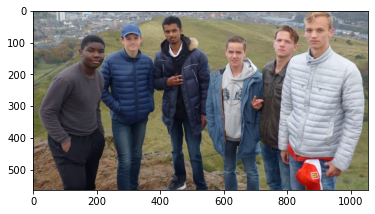

In [3]:
img = plt.imread('./groep.jpg')
plt.imshow(img)

print('deze afbeelding heeft een size van', img.shape)

Ik gebruik een groeps foto van een trip naar schotland. Ik wil graag uit deze foto alle gezichten kunnen halen. De dimensies zijn als volgt geïnterpreteerd: (lengte, breedte, diepte)

waardbij die diepte staat voor dat het een PNG bestand met RGB is, dit staat voor Red Green Blue en laat zien dat de afbeelding kleur heeft.

# 4. Data voorbereiden & opschonen

## Maak image greyscale

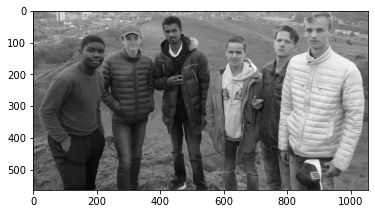

In [4]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

De reden dat we fotos greyscale maken ten opzichte van gewoon RGB laten is omdat we hierdoor de afbeeldingen simplificeren voor het alghoritme, en daarbij het rekenkracht terug trekken, waardoor snellere acties genomen kunnen worden

# 5. Modellen selecteren
- haar cascade classifier
- neural network

Ik heb beide gekozen omdat ze toch echt op een veel andere manier gezichten vinden, de haar cascade classifier vindt hem door feutures te herkennen in een afbeelding, terwijl het neural netwerk de afbeelding vergelijkt met andere afbeeldingen.

# 6. Modellen trainen en testen

## Haar cascade classifier

### Initeer de classifier

In [5]:
haar = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

### Detecteer gezichten

In [7]:
 faces = haar.detectMultiScale(
        gray,
        scaleFactor=1.2,
        minNeighbors=5,
        minSize=(10, 10),
        flags=cv.CASCADE_SCALE_IMAGE)

print("Aantal gezichten: " + str(faces.shape[0]))

Aantal gezichten: 6


Er staan ook 6 gezichten op de foto, dit ziet er goed uit!

### Resultaten

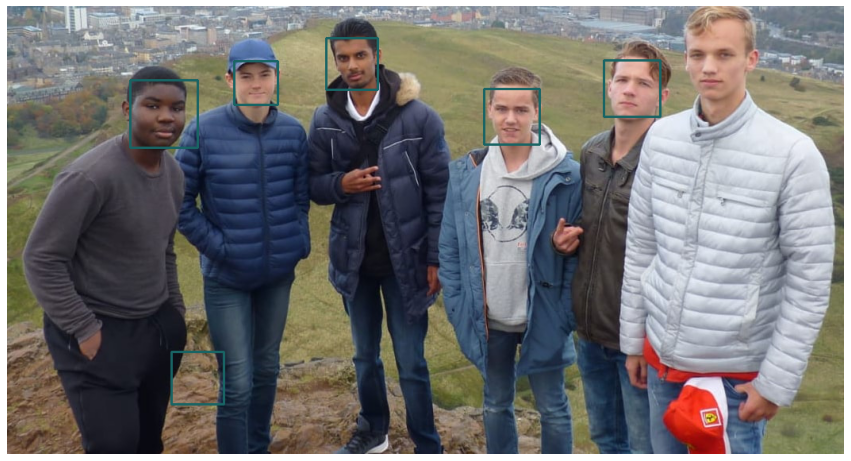

In [8]:
for (x,y,w,h) in faces:
    cv.rectangle(img,(x,y),(x+w,y+h),(25,100,100),2)
    
plt.figure(figsize=(15,10))
plt.imshow(img)
plt.axis('off');

Helaas heeft hij de jongen helemaal rechts niet herkent. Maar wel een stuk steen linksonder. Voor de rest kan je zeggen dat de cascade classifier moet 'basic' settings een true positive rate van 5 heeft, 1 false positive en 1 true negative. dus hij heeft een accuracy van _71.43%_

## CNN (Convolutional Neural Network)

CNN (Convolutional Neural Network) heb ik gebruikt omdat ik meer grip wil hebben in het toepassen van neurale netwerken in machine learning. Nou ga ik een pretrained neural net gebruiken van mtcnn. Hierdoor hoef ik zelf niet allemaal foto's van gezichten op te slaan en kan ik die stap overslaan, wat erg veel werk scheelt. Verder verwacht ik dat CNN het beter zal doen dan haar-cascade classifier, aangezien ik na wat onderzoek kon concluderen van CNN minder snel is maar wel accurater.

### Library's toevoegen

In [11]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
# print version
print('De versie die ik gebruik is:', mtcnn.__version__)

De versie die ik gebruik is: 0.1.0


### Afbeelding laden en detector initiëren

In [13]:
filename = 'groep.jpg'

pixels = pyplot.imread(filename)
detector = MTCNN()

### Maak een box

Hier zal ik door middel van een functie die ik van _pypi*_ heb een box maken om de herkende gezichten.

In [17]:
def draw_image_with_boxes(filename, result_list):
	data = pyplot.imread(filename)
	pyplot.imshow(data)
	ax = pyplot.gca()
	for result in result_list:
		x, y, width, height = result['box']
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		ax.add_patch(rect)

### Resultaat

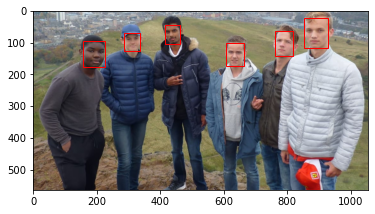

In [18]:
faces = detector.detect_faces(pixels)
draw_image_with_boxes(filename, faces)

Wow, hij heeft alle 6 gezichten goed herkent. Dit is zoals verwacht aangezien het geen moeilijke afbeelding is om gezichten te herkennen. Maar daarnaast heeft hij ook 6 false positives erbij gedaan. dus deze CNN model heeft een accuracy van 100%.

# 7. Conclusie

De conclusie die ik kan trekken uit beide classifiers gebrijkt te hebben is dat CNN beter is dan haar cascade, dat gezegd hebbende. Denk ik dat ik de haar cascade nog wel zo kan 'tunen' dat hij ook op deze afbeelding een accuracy heeft van 100%. Dit heb ik niet gedaan omdat ik het belangrijk vond om te kijken naar het kale model. Dus welk model vanaf scratch beter is dan de ander. 

# 8. bronnen

- [Pypi](https://pypi.org/project/mtcnn/)
- [Info CNN](https://medium.datadriveninvestor.com/introduction-to-how-cnns-work-77e0e4cde99b)